# TP2: Redes Neuronales 2
### Francisco Mendizabal (61454)

# Clasificación de texto

Nada nuevo acá.

In [8]:
from sklearn.datasets import fetch_20newsgroups
from matplotlib import pyplot as plt
from collections import Counter
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import numpy as np
import gensim
import os, re, csv, math, codecs
from IPython.display import Audio

In [14]:
import numpy as np
from scipy.io import wavfile

# Configuración del sonido de alarma
duration = 2     # Duración del sonido en segundos (ajusta según tus preferencias)
frequency = 500  # Frecuencia en Hz (ajusta según el tono que desees)
amplitude = 0.5  # Amplitud (volumen)

# Generar el tono de alarma (en este caso, un tono sinusoidal)
t = np.linspace(0, duration, int(duration * 44100), endpoint=False)
signal = amplitude * np.sin(2 * np.pi * frequency * t)

# Guardar el sonido en un archivo WAV
output_file = "alarm_sound.wav"
wavfile.write(output_file, 44100, signal.astype(np.float32))

print(f"Archivo de sonido '{output_file}' generado exitosamente.")

#Audio("alarm_sound.wav", autoplay=True)

Archivo de sonido 'alarm_sound.wav' generado exitosamente.


In [16]:
from pprint import pprint
pprint(newsgroups_train.target_names)

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']


In [17]:
pprint(newsgroups_train.target)

array([7, 4, 4, ..., 3, 1, 8])


In [18]:
print(newsgroups_train.data[16])

From: ab@nova.cc.purdue.edu (Allen B)
Subject: Re: TIFF: philosophical significance of 42
Organization: Purdue University
Lines: 39

In article <prestonm.735400848@cs.man.ac.uk> prestonm@cs.man.ac.uk (Martin  
Preston) writes:
> Why not use the PD C library for reading/writing TIFF files? It took me a
> good 20 minutes to start using them in your own app.

I certainly do use it whenever I have to do TIFF, and it usually works
very well.  That's not my point.  I'm >philosophically< opposed to it
because of its complexity.

This complexity has led to some programs' poor TIFF writers making
some very bizarre files, other programs' inability to load TIFF
images (though they'll save them, of course), and a general
inability to interchange images between different environments
despite the fact they all think they understand TIFF.

As the saying goes, "It's not me I'm worried about- it's all the
>other<  assholes out there!"  I've had big trouble with misuse and
abuse of TIFF over the years, 

In [19]:
token = Tokenizer(num_words=30000, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ', char_level=False, oov_token="UNK", document_count=0)

In [20]:
token.fit_on_texts(newsgroups_train.data)

In [21]:
train_sequences = token.texts_to_sequences(newsgroups_train.data)
test_sequences = token.texts_to_sequences(newsgroups_test.data)

In [22]:
train_sequences[0]

[15,
 1,
 4309,
 1351,
 16,
 11127,
 39,
 251,
 30,
 43,
 299,
 10,
 18,
 96,
 79,
 92,
 23734,
 4309,
 1351,
 16,
 35,
 78,
 4,
 2953,
 611,
 1768,
 33,
 212,
 9,
 27,
 1309,
 28,
 172,
 67,
 48,
 124,
 9880,
 64,
 17,
 18,
 299,
 9,
 709,
 2,
 87,
 264,
 12,
 27,
 5,
 37,
 1498,
 2267,
 299,
 1163,
 3,
 19,
 15,
 2,
 1348,
 13638,
 844,
 15449,
 12,
 27,
 338,
 5,
 1,
 2,
 4018,
 81,
 183,
 485,
 8,
 1377,
 2,
 845,
 8165,
 27,
 1836,
 15,
 2,
 817,
 4,
 2,
 727,
 18,
 10,
 45,
 9,
 89,
 28,
 172,
 40,
 1,
 5,
 829,
 274,
 1079,
 2909,
 199,
 4,
 2805,
 154,
 18,
 299,
 10,
 240,
 629,
 26,
 809,
 358,
 14,
 22,
 17,
 18,
 21901,
 385,
 299,
 182,
 113,
 189,
 207,
 1499,
 1342,
 3,
 14,
 36,
 59,
 7861,
 1]

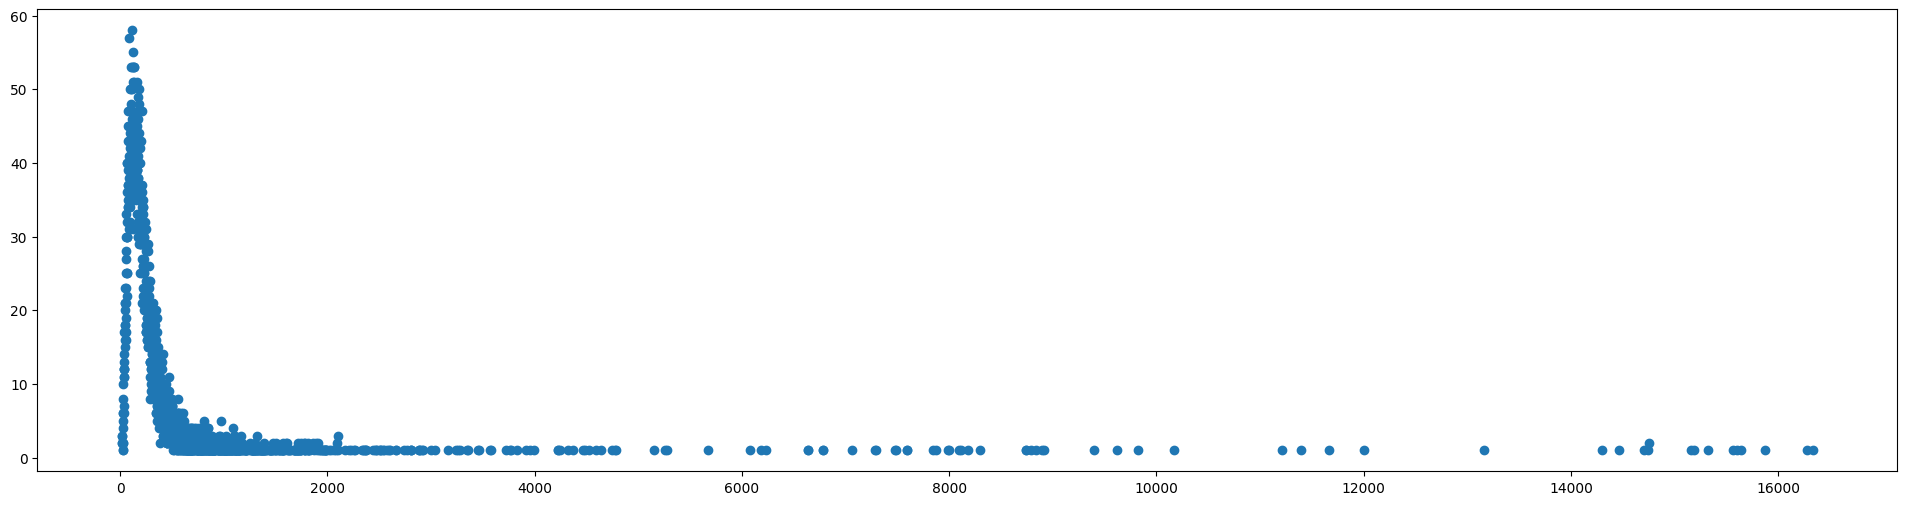

In [23]:
lengths=[len(seq) for seq in train_sequences]
lengths=dict(Counter(lengths))
plt.figure(figsize=[24,6])
plt.scatter(list(lengths.keys()), list(lengths.values()))
plt.show()

In [24]:
max_len = 500
train_sequences = pad_sequences(train_sequences, maxlen=max_len)
test_sequences = pad_sequences(test_sequences, maxlen=max_len)

In [25]:
train_sequences[0]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [26]:
reverse_dictionary = token.index_word
dictionary = dict([(value, key) for (key, value) in reverse_dictionary.items()])

In [27]:
token.index_word

{1: 'UNK',
 2: 'the',
 3: 'to',
 4: 'of',
 5: 'a',
 6: "'ax",
 7: 'and',
 8: 'in',
 9: 'i',
 10: 'is',
 11: 'that',
 12: 'it',
 13: 'for',
 14: 'you',
 15: 'from',
 16: 'edu',
 17: 'on',
 18: 'this',
 19: 'be',
 20: 'are',
 21: 'not',
 22: 'have',
 23: 'with',
 24: 'as',
 25: '1',
 26: 'or',
 27: 'was',
 28: 'if',
 29: 'but',
 30: 'subject',
 31: 'they',
 32: 'com',
 33: 'lines',
 34: 'at',
 35: 'organization',
 36: 'by',
 37: '2',
 38: 'an',
 39: 'my',
 40: 'can',
 41: 'x',
 42: '3',
 43: 'what',
 44: '0',
 45: 'all',
 46: 'will',
 47: 'm',
 48: 'there',
 49: 'would',
 50: 'one',
 51: 'do',
 52: "'",
 53: 'about',
 54: 're',
 55: 'we',
 56: 'writes',
 57: 'so',
 58: 'he',
 59: 'your',
 60: 'no',
 61: 'has',
 62: 'article',
 63: 'any',
 64: 'me',
 65: 'some',
 66: 'who',
 67: 'out',
 68: 'which',
 69: '4',
 70: 'q',
 71: 'more',
 72: 'like',
 73: 'people',
 74: "don't",
 75: 'when',
 76: '5',
 77: 'just',
 78: 'university',
 79: 'posting',
 80: 'their',
 81: 'were',
 82: 'up',
 83: 'r'

In [28]:
#load embeddings
from google.colab import drive
drive.mount('/content/drive')
EMBEDDING_DIR = "/content/drive/My Drive/Colab Notebooks/"
print('loading word embeddings...')
embeddings_index = {}
f = codecs.open(EMBEDDING_DIR + 'wiki-news-300d-1M.vec', encoding='utf-8')
for line in f:
    values = line.rstrip().rsplit(' ')
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('found %s word vectors' % len(embeddings_index))

Mounted at /content/drive
loading word embeddings...
found 999995 word vectors


In [29]:
embeddings_index["car"]

array([-1.600e-02, -3.000e-04, -1.684e-01,  8.990e-02, -2.000e-02,
       -9.300e-03,  4.820e-02, -3.080e-02, -4.510e-02,  6.000e-04,
        1.680e-01,  9.650e-02,  3.061e-01, -4.110e-02,  2.960e-02,
       -4.630e-02,  3.250e-02, -7.030e-02,  2.220e-02, -1.404e-01,
       -2.638e-01, -1.340e-02,  1.277e-01,  1.227e-01,  1.803e-01,
       -1.920e-02,  3.530e-02,  1.214e-01,  1.509e-01, -8.610e-02,
        9.760e-02, -2.550e-02, -2.760e-02, -1.556e-01, -7.390e-02,
        5.430e-02, -6.700e-02, -3.000e-03,  1.515e-01,  6.080e-02,
        3.300e-02,  7.470e-02,  9.000e-04,  5.500e-02,  4.800e-03,
       -1.320e-02, -2.620e-02, -1.804e-01,  8.050e-02,  4.640e-02,
       -1.590e-02, -3.020e-02, -6.785e-01,  1.632e-01,  1.030e-02,
        6.550e-02, -8.430e-02,  2.270e-02,  3.350e-02, -3.560e-02,
       -6.380e-02, -1.111e-01, -1.700e-03,  9.780e-02,  5.650e-02,
       -3.520e-02,  3.950e-02,  1.867e-01,  7.900e-02, -1.234e-01,
        1.860e-02,  8.900e-02,  1.631e-01,  7.830e-02,  5.610e

In [30]:
embed_dim=300
num_words=len(dictionary)+1
embedding_matrix=np.zeros([num_words,embed_dim])
for word, idx in dictionary.items():
  if idx <= num_words and word in embeddings_index:
    embedding_matrix[idx,:]=embeddings_index[word]

# MLP + Embeddings + Attention + CNN

Primero se probaron todas las redes de la notebook. Debido a los resultados, y a lo solicitado en la consigna, las redes de mayor interés resultaron ser la red 3 "TextCNN" y la red 5 "MLP + Embeddings + Attention + CNN".

La idea fue hacer una red con las características de ambas redes, es decir, la estructura general de la red 5, pero modificando las capas convolucionales, para obtener algo similar a la red 3.

Antes de obtener la red final, se probó modificar algunos hiperpárametros para analizar su influencia sobre el resultado final:

*   La red original tuvo un accuracy de 0.8405.
*   Modificando la activación de la última capa convolucional por tanh, el accuracy disminuyó a 0.8299.
*   Modificando el batch size a 16 y 64, no se observaron diferencias significativas, por lo cual se utilizó el valor de 64 para mayor velocidad de entrenamiento.
*   Aumentar el tamaño de la capa densa a 200 no mostró diferencias significativas, por lo cual se mantuvo el valor de 100.
*   Aumentar value_dim a 200, dio un accuracy de 0.8489.

En definitiva, solo se hizo el último cambio a los hiperparámetros la red original. Se probo que value_dim=300 daba todavía mejores resultados, pero se optó por el valor de 200 debido a la demora en el entrenamiento.

Lo siguiente fue fusionar las estructuras. Para ello, se reemplazo la primera capa convolucional por una serie de capas de distintos tamaños, que luego se concatenarían antes de la siguiente capa. Esto permite detectar patrones de distintos tamaños en el lenguaje, de la misma forma que lo hacíamos en imágenes.

Se probaron:

*   Capas de tamaños 2-4, logrando un accuracy de 0.8608.
*   Capas de tamaños 2-8, logrando un accuracy de 0.8719.

Por lo tanto, nos quedamos con la de mayor accuracy.


In [37]:
from keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dropout, Dense, Input, Concatenate, Reshape
from keras.layers import Dot, RepeatVector, TimeDistributed, Multiply, Lambda, Flatten, BatchNormalization, Activation
import keras.backend as K
from keras.activations import softmax
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [38]:
def softMaxOverTime(x):
    return softmax(x, axis=1)

In [53]:
# Parametros
value_dim = 200
nb_words = num_words
early_stop = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

K.clear_session()
input_layer = Input(shape=(max_len,))
embedding_layer = Embedding(nb_words, embed_dim, weights=[embedding_matrix], input_length=max_len, trainable=False)(input_layer)
#conv_out = Conv1D(value_dim, 8, padding="same")(embedding_layer)
conv8 = Conv1D(value_dim, 8, activation='relu', padding='same')(embedding_layer)
conv7 = Conv1D(value_dim, 7, activation='relu', padding='same')(embedding_layer)
conv6 = Conv1D(value_dim, 6, activation='relu', padding='same')(embedding_layer)
conv5 = Conv1D(value_dim, 5, activation='relu', padding='same')(embedding_layer)
conv4 = Conv1D(value_dim, 4, activation='relu', padding='same')(embedding_layer)
conv3 = Conv1D(value_dim, 3, activation='relu', padding='same')(embedding_layer)
conv2 = Conv1D(value_dim, 2, activation='relu', padding='same')(embedding_layer)
conv_out = Concatenate()([conv8, conv7, conv6, conv5, conv4, conv3, conv2])
#conv_out = Concatenate()([conv4, conv3, conv2])
conv_out = Activation("relu")(conv_out)
conv_out = Conv1D(value_dim, 8, activation="tanh", padding="same")(conv_out)
ulog_attention = Dense(1, activation="linear")(conv_out)
attention = Activation(softMaxOverTime)(ulog_attention)
repeated_attention = TimeDistributed(RepeatVector(value_dim))(attention)
repeated_attention = Reshape([max_len, value_dim])(repeated_attention)
weighted_embeddings = Multiply()([repeated_attention, conv_out])
embedding_sum = Lambda(lambda x: K.sum(x, axis=1))(weighted_embeddings)
dense1 = Dense(100, activation='relu')(embedding_sum)
dense2 = Dense(20, activation='softmax')(dense1)

adam = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

In [54]:
model = Model(input_layer, dense2)
model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 500)]                0         []                            
                                                                                                  
 embedding (Embedding)       (None, 500, 300)             4024320   ['input_1[0][0]']             
                                                          0                                       
                                                                                                  
 conv1d (Conv1D)             (None, 500, 200)             480200    ['embedding[0][0]']           
                                                                                                  
 conv1d_1 (Conv1D)           (None, 500, 200)             420200    ['embedding[0][0]']       

In [55]:
model.fit(train_sequences, newsgroups_train.target, batch_size=64, epochs=100, validation_split=0.2, callbacks=early_stop)

Epoch 1/100
142/142 [==============================] - 35s 217ms/step - loss: 1.9715 - accuracy: 0.3643 - val_loss: 0.9398 - val_accuracy: 0.6947
Epoch 2/100
142/142 [==============================] - 31s 216ms/step - loss: 0.6923 - accuracy: 0.7749 - val_loss: 0.6504 - val_accuracy: 0.8020
Epoch 3/100
142/142 [==============================] - 31s 215ms/step - loss: 0.4222 - accuracy: 0.8668 - val_loss: 0.5992 - val_accuracy: 0.8250
Epoch 4/100
142/142 [==============================] - 30s 214ms/step - loss: 0.2376 - accuracy: 0.9281 - val_loss: 0.6336 - val_accuracy: 0.8405
Epoch 5/100
142/142 [==============================] - 30s 215ms/step - loss: 0.1474 - accuracy: 0.9555 - val_loss: 0.6188 - val_accuracy: 0.8458
Epoch 6/100
142/142 [==============================] - 30s 213ms/step - loss: 0.0904 - accuracy: 0.9732 - val_loss: 0.6931 - val_accuracy: 0.8396
Epoch 7/100
142/142 [==============================] - 30s 211ms/step - loss: 0.0578 - accuracy: 0.9824 - val_loss: 0.7024 -

In [57]:
model.evaluate(test_sequences, newsgroups_test.target)

236/236 [==============================] - 10s 41ms/step - loss: 1.2652 - accuracy: 0.7811


[1.2651829719543457, 0.781067430973053]

Vemos que el accuracy en test es un poco inferior al de validación, y se encuentra cerca del 78%.

# LSTM Bidireccional

Luego se cambia el contextualizador (las capas convolucionales) por una LSTM bidireccional. En este caso se probaron los modos de "sum y "concat", alcanzando unos accuracy de 0.8542 y 0.8586 respectivamente.

In [59]:
from keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dropout, Dense, Input, Concatenate, Reshape
from keras.layers import Dot, RepeatVector, TimeDistributed, Multiply, Lambda, Bidirectional, LSTM, Activation
import keras.backend as K
from keras.activations import softmax
from keras.models import Model
from keras.optimizers import Adam

In [61]:
# Parametros
value_dim = 200
nb_words = num_words

K.clear_session()
input_layer = Input(shape=(max_len,))
embedding_layer = Embedding(nb_words, embed_dim, weights=[embedding_matrix], input_length=max_len, trainable=False)(input_layer)
#lstm_out = Bidirectional(LSTM(value_dim, return_sequences=True, activation="tanh"), merge_mode="sum")(embedding_layer)
lstm_out = Bidirectional(LSTM(value_dim, return_sequences=True, activation="tanh"), merge_mode="concat")(embedding_layer)
ulog_attention = Dense(1, activation="linear")(lstm_out)
attention = Activation(softMaxOverTime)(ulog_attention)
repeated_attention = TimeDistributed(RepeatVector(2*value_dim))(attention)
repeated_attention = Reshape([max_len, 2*value_dim])(repeated_attention)
weighted_embeddings = Multiply()([repeated_attention, lstm_out])
embedding_sum = Lambda(lambda x: K.sum(x, axis=1))(weighted_embeddings)
dense1 = Dense(100, activation='relu')(embedding_sum)
dense2 = Dense(20, activation='softmax')(dense1)

In [62]:
adam = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model = Model(input_layer, dense2)
model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 500)]                0         []                            
                                                                                                  
 embedding (Embedding)       (None, 500, 300)             4024320   ['input_1[0][0]']             
                                                          0                                       
                                                                                                  
 bidirectional (Bidirection  (None, 500, 400)             801600    ['embedding[0][0]']           
 al)                                                                                              
                                                                                              

In [63]:
model.fit(train_sequences, newsgroups_train.target, batch_size=64, epochs=100, validation_split=0.2, callbacks=early_stop)

Epoch 1/100
142/142 [==============================] - 26s 129ms/step - loss: 2.7120 - accuracy: 0.1198 - val_loss: 2.4405 - val_accuracy: 0.1463
Epoch 2/100
142/142 [==============================] - 15s 103ms/step - loss: 2.1238 - accuracy: 0.2770 - val_loss: 1.7438 - val_accuracy: 0.3937
Epoch 3/100
142/142 [==============================] - 14s 98ms/step - loss: 1.4369 - accuracy: 0.4975 - val_loss: 1.1543 - val_accuracy: 0.6036
Epoch 4/100
142/142 [==============================] - 14s 97ms/step - loss: 0.9971 - accuracy: 0.6685 - val_loss: 0.9173 - val_accuracy: 0.6832
Epoch 5/100
142/142 [==============================] - 14s 97ms/step - loss: 0.7528 - accuracy: 0.7527 - val_loss: 0.7181 - val_accuracy: 0.7596
Epoch 6/100
142/142 [==============================] - 14s 97ms/step - loss: 0.6077 - accuracy: 0.8016 - val_loss: 0.6635 - val_accuracy: 0.7852
Epoch 7/100
142/142 [==============================] - 14s 98ms/step - loss: 0.5165 - accuracy: 0.8296 - val_loss: 0.6190 - val_

In [65]:
model.evaluate(test_sequences, newsgroups_test.target)

236/236 [==============================] - 6s 27ms/step - loss: 1.7386 - accuracy: 0.7666


[1.7386465072631836, 0.7665958404541016]

Vemos que esta red tiene una performance ligeramente inferior a la primera, y un tiempo de procesamiento similar, pues le lleva el doble de epochs en converger, pero cada epoch demora la mitad.